In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from data_loader.load_data import ImagesLoader

from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier, \
                             AdaBoostClassifier, \
                             ExtraTreesClassifier

from sklearn.dummy import DummyClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, \
                            confusion_matrix, \
                            ConfusionMatrixDisplay

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)

In [3]:
DATASET_NAME = 'simpsons-small'
PIPELINE_NAME = 'descriptor_lbp'

# **CARREGANDO OS DADOS**

In [6]:
loader = ImagesLoader(train_images_path=f'../data/{DATASET_NAME}/train/',
                      test_images_path=f'../data/{DATASET_NAME}/test/')

data = loader.load_data(load_list=[PIPELINE_NAME])

+ 'names_files' loaded
+ 'names_paths' loaded
+ 'names_characters' loaded
+ 'names_encoded' loaded
+ 'images_original' loaded
+ 'images_resized' loaded
+ 'images_gray' loaded
- 'images_blue' not in load list
- 'images_green' not in load list
- 'images_red' not in load list
- 'images_hsv' not in load list
- 'images_h' not in load list
- 'images_s' not in load list
- 'images_v' not in load list
- 'images_lbp' not in load list
- 'images_hu' not in load list
- 'images_gabor' not in load list
- 'images_hog' not in load list
- 'descriptor_blue' not in load list
- 'descriptor_green' not in load list
- 'descriptor_red' not in load list
- 'descriptor_rgb' not in load list
- 'descriptor_h' not in load list
- 'descriptor_s' not in load list
- 'descriptor_v' not in load list
- 'descriptor_hsv' not in load list
+ 'descriptor_lbp' loaded
- 'descriptor_hu' not in load list
- 'descriptor_gabor' not in load list
- 'descriptor_hog' not in load list
- 'combination_rgb+hsv' not in load list
- 'combination

In [7]:
print('names_characters')
print(np.array(data['names_characters']['train']).shape,
      np.array(data['names_characters']['test']).shape, end='\n\n')

print(PIPELINE_NAME)
print(np.array(data[PIPELINE_NAME]['train']).shape,
      np.array(data[PIPELINE_NAME]['test']).shape)

names_characters
(226,) (95,)

descriptor_lbp
(226, 10) (95, 10)


# **TRAIN-TEST SPLIT**

In [8]:
X_train = np.array(data[PIPELINE_NAME]['train'])
y_train = np.array(data['names_encoded']['train'])

X_test = np.array(data[PIPELINE_NAME]['test'])
y_test = np.array(data['names_encoded']['test'])

X_train.shape, X_test.shape

((226, 10), (95, 10))

# **PIPELINE DE MODELOS**

In [9]:
models = {
    'knn': KNeighborsClassifier(),
    'nb': GaussianNB(),
    'lsvc': LinearSVC(),
    'svc': SVC(),
    'lr': LogisticRegression(),
    'rf': RandomForestClassifier(),
    'lgbm': LGBMClassifier(),
    'xgb': XGBClassifier(),
    'ab': AdaBoostClassifier(),
    'et': ExtraTreesClassifier(),
    'mlp': MLPClassifier(),
    'dc': DummyClassifier(strategy='stratified')
}

preds = {}
results = {}

In [10]:
# treinando e realizando as predições

for name, model in zip(list(models.keys()), list(models.values())):    
    pipe = Pipeline([
        ('scaler', MinMaxScaler(feature_range=(0,1))),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    preds[name] = y_pred
    results[name] = classification_report(y_test, y_pred, output_dict=True)
        
    print(name, 'completed')

knn completed
nb completed
lsvc completed
svc completed
lr completed
rf completed
lgbm completed
xgb completed
ab completed
et completed
mlp completed
dc completed


# **EXIBIÇÃO DOS RESULTADOS**

In [11]:
# criando um df de resultados dos modelos

for name, result, i in zip(list(results.keys()),
                           list(results.values()),
                           range(len(results))): 
    # df do classification report 
    df_report = pd.DataFrame(data=results[name]).T

    # dicionário para decodificar labels
    decoded_labels = {value: key for value, key in zip(list(loader.encoded_labels.values()),
                                                       list(loader.encoded_labels.keys()))}

    # decodificando labels
    df_report.index = list(map(lambda field: decoded_labels[int(field)] \
                               if field in np.array(list(loader.encoded_labels.values())).astype(str) \
                               else field, list(df_report.index)))

    # definindo index com o modelo
    arrays = [[name for i in range(9)], df_report.T.columns]
    tuples = list(zip(*arrays))
    index = pd.MultiIndex.from_tuples(tuples, names=['model', 'labels'])
    df_report.index = index

    # mesclando os df_reports
    if i == 0:
        df_results = df_report
    else:
        df_results = pd.concat([df_results, df_report], axis=0)

# df_results.replace({0: 'homer'})
df_results

precision    recall  f1-score    support
model labels                                                
knn   bart           0.428571  0.514286  0.467532  35.000000
      homer          0.239130  0.440000  0.309859  25.000000
      lisa           0.333333  0.076923  0.125000  13.000000
      marge          0.500000  0.100000  0.166667  10.000000
      maggie         0.000000  0.000000  0.000000  12.000000
      accuracy       0.326316  0.326316  0.326316   0.326316
      macro avg      0.300207  0.226242  0.213812  95.000000
      weighted avg   0.319069  0.326316  0.288440  95.000000
nb    bart           0.250000  0.057143  0.093023  35.000000
      homer          0.229730  0.680000  0.343434  25.000000
      lisa           0.200000  0.076923  0.111111  13.000000
      marge          0.000000  0.000000  0.000000  10.000000
      maggie         0.000000  0.000000  0.000000  12.000000
      accuracy       0.210526  0.210526  0.210526   0.210526
      macro avg      0.135946  0.162813  0.109514  95.000000
      weighted avg   0.179929  0.210526  0.139854  95.000000
lsvc  bart           0.433333  0.742857  0.547368  35.000000
      homer          0.258065  0.320000  0.285714  25.000000
      lisa           0.000000  0.000000  0.000000  13.000000
      marge          0.000000  0.000000  0.000000  10.000000
      maggie         0.000000  0.000000  0.000000  12.000000
      accuracy       0.357895  0.357895  0.357895   0.357895
      macro avg      0.138280  0.212571  0.166617  95.000000
      weighted avg   0.227561  0.357895  0.276850  95.000000
svc   bart           0.409836  0.714286  0.520833  35.000000
      homer          0.344828  0.400000  0.370370  25.000000
      lisa           0.500000  0.076923  0.133333  13.000000
      marge          0.000000  0.000000  0.000000  10.000000
      maggie         0.000000  0.000000  0.000000  12.000000
      accuracy       0.378947  0.378947  0.378947   0.378947
      macro avg      0.250933  0.238242  0.204907  95.000000
      weighted avg   0.310157  0.378947  0.307597  95.000000
lr    bart           0.450000  0.771429  0.568421  35.000000
      homer          0.258065  0.320000  0.285714  25.000000
      lisa           0.000000  0.000000  0.000000  13.000000
      marge          0.000000  0.000000  0.000000  10.000000
      maggie         0.000000  0.000000  0.000000  12.000000
      accuracy       0.368421  0.368421  0.368421   0.368421
      macro avg      0.141613  0.218286  0.170827  95.000000
      weighted avg   0.233701  0.368421  0.284606  95.000000
rf    bart           0.487805  0.571429  0.526316  35.000000
      homer          0.266667  0.480000  0.342857  25.000000
      lisa           0.500000  0.076923  0.133333  13.000000
      marge          0.250000  0.100000  0.142857  10.000000
      maggie         0.000000  0.000000  0.000000  12.000000
      accuracy       0.357895  0.357895  0.357895   0.357895
      macro avg      0.300894  0.245670  0.229073  95.000000
      weighted avg   0.344630  0.357895  0.317415  95.000000
lgbm  bart           0.447368  0.485714  0.465753  35.000000
      homer          0.312500  0.600000  0.410959  25.000000
      lisa           0.333333  0.076923  0.125000  13.000000
      marge          0.333333  0.100000  0.153846  10.000000
      maggie         0.000000  0.000000  0.000000  12.000000
      accuracy       0.357895  0.357895  0.357895   0.357895
      macro avg      0.285307  0.252527  0.231112  95.000000
      weighted avg   0.327759  0.357895  0.313040  95.000000
xgb   bart           0.465116  0.571429  0.512821  35.000000
      homer          0.309524  0.520000  0.388060  25.000000
      lisa           0.250000  0.076923  0.117647  13.000000
      marge          0.333333  0.100000  0.153846  10.000000
      maggie         0.000000  0.000000  0.000000  12.000000
      accuracy       0.368421  0.368421  0.368421   0.368421
      macro avg      0.271595  0.253670  0.234475  95.000000
      weighted avg   0.322111  0.368421  0.323348  95.0

In [12]:
# # salvar resultados?
# df_results.to_csv(f'../output/pipeline_{PIPELINE_NAME}_results.csv')

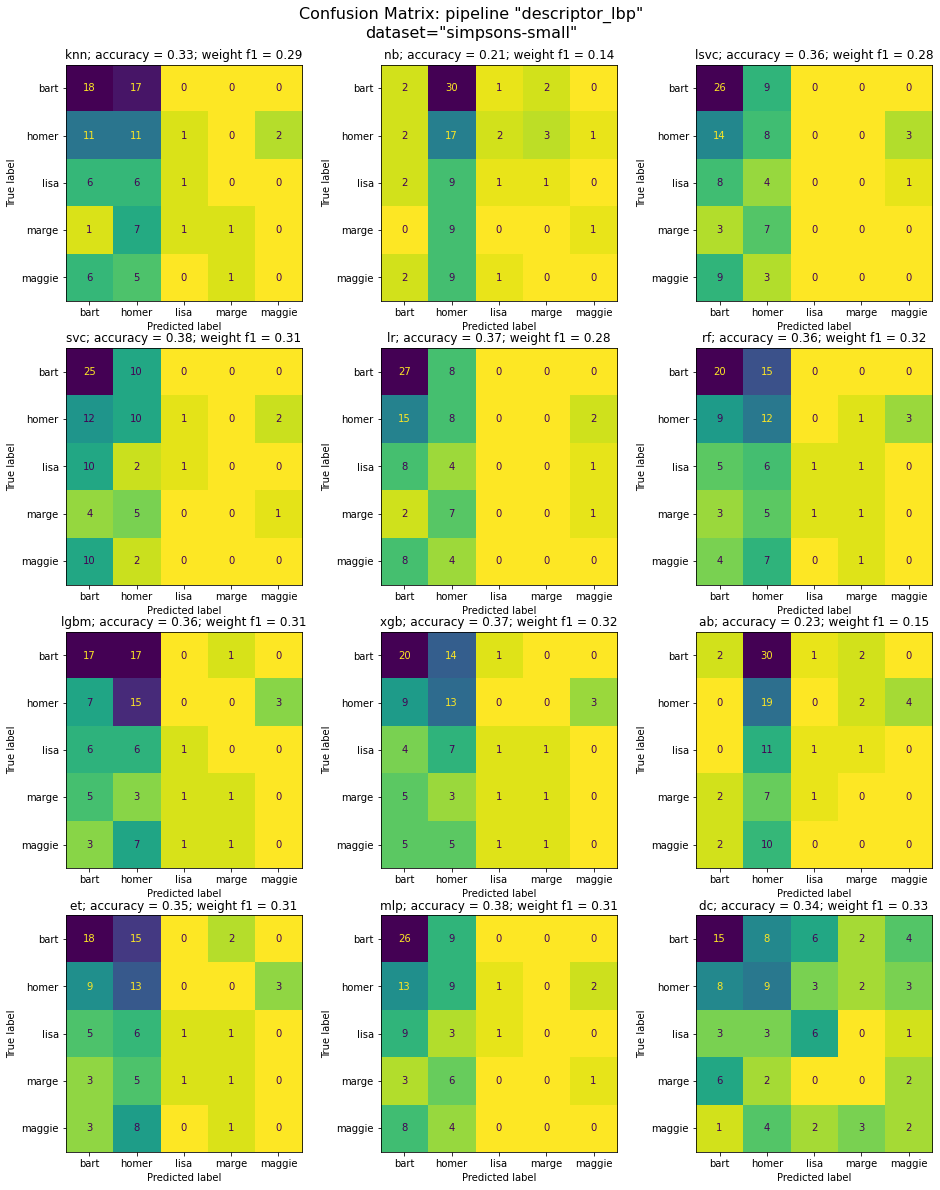

In [13]:
# exibindo a matriz de confusão dos modelos

fig, ax = plt.subplots(4,3, figsize=(16,20))

fig.text(x=.5,
         y=.92,
         s=f'Confusion Matrix: pipeline "{PIPELINE_NAME}"\ndataset="{DATASET_NAME}"',
         horizontalalignment='center',
         verticalalignment='top',
         fontsize=16)

for name, pred, i in zip(list(preds.keys()),
                            list(preds.values()),
                            range(len(preds))):
    
    cm = confusion_matrix(y_test, pred)
    cm_plot = ConfusionMatrixDisplay(cm, display_labels=loader.labels)
    cm_plot.plot(cmap='viridis_r', ax=ax.ravel()[i]);
    cm_plot.im_.colorbar.remove()

    ax.ravel()[i].set_title(f"{name}; accuracy = " \
                            f"{round(results[name]['accuracy'], 2)}; " \
                            f"weight f1 = " \
                            f"{round(results[name]['weighted avg']['f1-score'], 2)}");

# plt.savefig(f'../images/pipeline_{PIPELINE_NAME}_cm.jpg')